### **Ćwiczenie 2** - sieć wielowarstwowa uczona metodą propagacji wstecznej

In [6]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

11493376/11490434 [==============================] - 4s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [211]:
import numpy as np
import random as random

class Network():
    
    # Utils
    
    def __generate_random_matrix(self, shape_x, shape_y, max_value=1):
        return np.random.rand(shape_x, shape_y) * 2 * max_value - max_value
    
    def __generate_random_number(self, max_value=1):
        return random.random() * 2 * max_value - max_value
    
    # Constructor
    
    def __init__(self, layer_shapes):
        self.weights = []
        self.biases = []
        self.a = []
        
        for layer_shape in layer_shapes:
            shape_x, shape_y = layer_shape
            self.weights.append(self.__generate_random_matrix(shape_x, shape_y))
            self.biases.append(self.__generate_random_number())
        
    # Code
    
    @staticmethod
    def normalize(X):
        return X / 254
    
    def __propagate_forward(self, a):
        self.a = []
        for i, (b, w) in enumerate(zip(self.biases, self.weights)):
            a = self.__sigmoid(w @ a + b)
            self.a.append(a)
        return a
    
    def __sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))
    
    def __sigmoid_derivative(self, z):
        return z * (1.0 - z)

    def train(self, train_X, train_y):
        
        for i in range(100):
            for X_arr, y in zip(train_X, train_y):
                a = self.__propagate_forward(X_arr)

                error = (a - y)**2

                adjustment = 0.01 * error * self.__sigmoid_derivative(a)

                self.weights[1] += adjustment @ self.a[0].T

                hidden_errors = self.weights[1].T @ error

                adjustment = 0.01 * hidden_errors * self.__sigmoid_derivative(self.a[0])

                self.weights[0] += adjustment @ X_arr.T
    
    def predict(self, X):
        a = self.__propagate_forward(X)
        # print('Prediction result:\n', a)
        a[:] = np.where(a == np.max(a), 1, 0)
        return a
    
    def get_result(self, prediction):
        return np.where(prediction == np.max(prediction))[0][0]

In [212]:
np.random.seed(243)
random.seed(243)

image_reshaped_size = train_X.shape[1] * train_X.shape[2]
layer_shapes=[(15, image_reshaped_size), (10, 15)]

norm_train_X = []
for X_arr in train_X:
    norm_train_X.append(network.normalize(X_arr.reshape(image_reshaped_size, 1)))
    
labels = []
for y in train_y:
    label = np.zeros(10)
    label[y] = 1
    label = label.reshape(10, 1)
    labels.append(label)

network = Network(layer_shapes=layer_shapes)

# print('Predicted array:', network.propagate_forward(example_X))
# print('Result number:', network.get_number_from_prediction(prediction))
# print('Label:', train_y[0])

network.train(norm_train_X[:100], labels[:100])

results = 0
for i in range(100):   
    prediction = network.predict(norm_train_X[i])
    results += 1 if network.get_result(prediction) == train_y[i] else 0

print(f'Acc: {results}%')

Acc: 5%


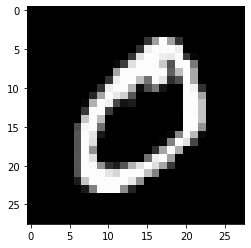

In [166]:
from matplotlib import pyplot

pyplot.imshow(train_X[1], cmap=pyplot.get_cmap('gray'))
pyplot.show()